# Module 5: Descriptive analysis with Plots

# <span style="color:darkblue"> Today: bar plot, line plot, grouped plot and time series plot</span>

<font size="5"> 

- Focus on two Packages: [matplotlib](https://matplotlib.org/stable/index.html) and [seaborn](https://seaborn.pydata.org/index.html)

- Both of these packages have great tutorials: [Matplotlib Tutorial](https://matplotlib.org/stable/tutorials/index.html) and [Seaborn Tutorial](https://seaborn.pydata.org/tutorial.html)

- Here are two interactive courses for data visualization using the two packages: [Matplotlib Datacamp Course](https://app.datacamp.com/learn/courses/introduction-to-data-visualization-with-matplotlib) and [Seaborn Datacamp Course](https://app.datacamp.com/learn/courses/introduction-to-data-visualization-with-seaborn)

## <span style="color:darkblue"> 1. Get started with matplotlib</span>

<font size="5"> 

1. **Important terminology:** ```Figure``` and ```Axes```

2. We can control the matplotlib graphs using the ```pyplot``` interphase


In [1]:
import matplotlib.pyplot as plt

<font size="5"> 

- ```Figure```: object that contains the information of different ```Axes``` 

- ```Axes```: is a set of plotting instructions attached to a ```Figure```. It contains:    

    - A region for plotting data  
    
    - Usually includes two ```Axis``` objects (be aware of the difference between Axes and Axis) 

    - A title (set via ```set_title()```), an x-label (set via ```set_xlabel()```), and a y-label (set via ```set_ylabel()```)

(<Figure size 640x480 with 1 Axes>, <AxesSubplot:>)

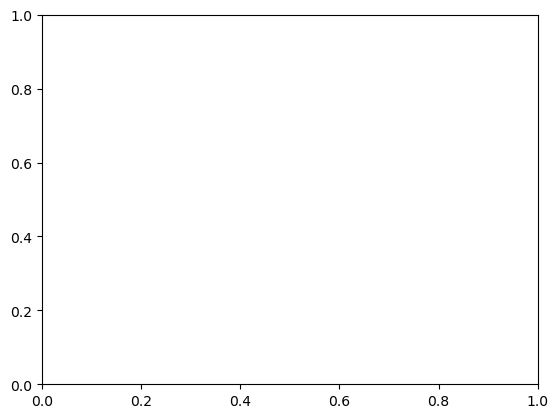

In [2]:
plt.subplots()  # a figure with a single Axes

(<Figure size 640x480 with 4 Axes>,
 array([[<AxesSubplot:>, <AxesSubplot:>],
        [<AxesSubplot:>, <AxesSubplot:>]], dtype=object))

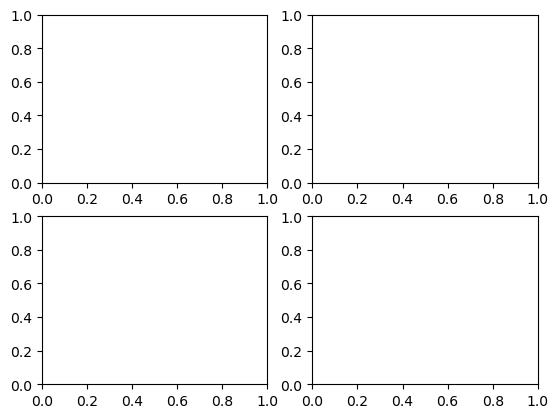

In [3]:
plt.subplots(2, 2)  # a figure with a 2x2 grid of Axes

<font size="5"> 

- **Example 1:** 

    - Create a basic line plot with the data $y = [1, 2, 3, 4]$ and $x = [1, 4, 2, 3]$

    - Set the title as: ```'Ploting Some data'``` and the y and x axis as $y$ and $x$, respectively

Text(0.5, 1.0, 'Plotting some data')

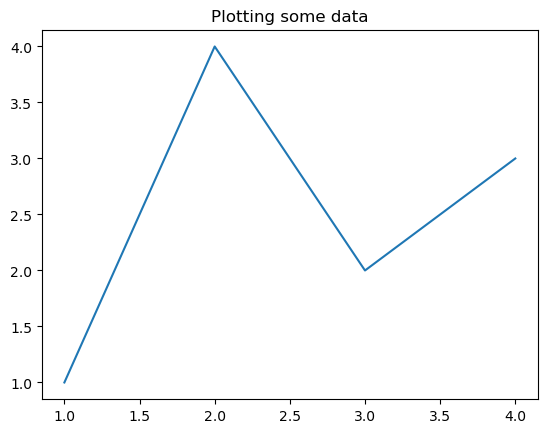

In [4]:
fig, ax = plt.subplots() 
ax.plot([1, 2, 3, 4], [1, 4, 2, 3])
ax.set_title('Plotting some data')

<font size="5"> 

## Some relevant options for a figure

<img src="figure.png" alt="drawing" width="650"/>

## <span style="color:darkblue"> 2. Combining matplotlib functions with Pandas plots</span>

<font size="5"> 

- We can use Pandas to do some basic plots using the function ```DataFrame.plot()```

- We can choose different types of plots by using the option ```kind```:

    - ```line``` is the default option

    - ```bar``` or ```barh``` for bar plots

    - ```hist``` for histogram

    - ```box``` for boxplot

    - ```area``` for area plots

    - ```scatter``` for scatter plots

    - ```pie``` for pie plots

In [5]:
import pandas as pd

names = pd.read_csv('data/names.csv')
features = pd.read_csv('data/features.csv')

<font size="5"> 

- **Example 2:**

1. Use the names and features tables in the data folder

2. Merge the two tables and group the table by ```model``` keeping the average 'mpg', 'cylinders', 'displacement', 'weight' and 'acceleration'

In [6]:
cars = pd.merge(names, features, on = 'vehicle id')

In [7]:
cars_model = cars[['model', 'mpg', 'cylinders', 'displacement', 'weight', 'acceleration']].groupby('model', as_index = False).mean()

In [8]:
cars_model.columns

Index(['model', 'mpg', 'cylinders', 'displacement', 'weight', 'acceleration'], dtype='object')

In [9]:
cars_model

,model,mpg,cylinders,displacement,weight,acceleration
0,70,17.689655,6.758621,281.413793,3372.793103,12.948276
1,71,21.250000,5.571429,209.750000,2995.428571,15.142857
2,72,18.714286,5.821429,218.392857,3237.714286,15.125000
3,73,17.100000,6.375000,256.875000,3419.025000,14.312500
4,74,22.703704,5.259259,171.740741,2877.925926,16.203704
5,75,20.266667,5.600000,205.533333,3176.800000,16.050000
6,76,21.573529,5.647059,197.794118,3078.735294,15.941176
7,77,23.375000,5.464286,191.392857,2997.357143,15.435714
8,78,24.061111,5.361111,177.805556,2861.805556,15.805556
9,79,25.093103,5.827586,206.689655,3055.344828,15.813793


<font size="5"> 

3. Create a bar plot with the average acceleration by model and customize the following characteristics of the plot:

    - Plot style: plt.style.available and plt.style.use()

    - Create a ```Figure``` and ```Axes``` using ```plt.subplots()```

    - Pass the Axes you just created as the argument to your Pandas plot using the option ```ax```

    - Set x and y axis to be ```Model``` and ```Seconds for 0 to 60 Miles``` (set_xlabel)

    - Set the title to be ```Average Acceleration by Models```
    
    - Drop the legend: ```legend().set_visible(False)```

    - Add a horizontal line with the average acceleration for all models (axhline)

    - We will use the following options: color='b', label='Aver|age', linestyle='--', linewidth=1

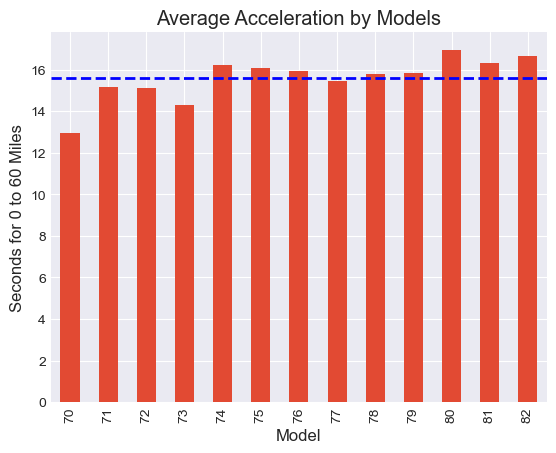

In [26]:
fig1, ax1 = plt.subplots() 
plt.style.use('seaborn-darkgrid')
cars_model.plot(kind = 'bar', x = 'model', y = 'acceleration', ax=ax1)

ax1.set_xlabel('Model')
ax1.set_ylabel('Seconds for 0 to 60 Miles')
ax1.set_title('Average Acceleration by Models')

ax1.legend().set_visible(False)

mean_acc = cars_model['acceleration'].mean()
ax1.axhline(mean_acc, color='b', linestyle='--', linewidth=2)
